In [ ]:
%%capture
!pip install shap
!pip install --upgrade gdown
!gdown --id 17MFhKNGVwzvCdCkO3hBaQf5c_WYG3wU4
!pip install imbalanced-learn
!pip install colorama

In [6]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.express as px

In [7]:
def bar(categories,x,y,color,title,xlab,ylab):
    fig = px.bar(categories, x=x, y=y,
                 color=color,
                 height=400)
    fig.update_layout(
        title_text=title,
        xaxis_title_text=xlab,
        yaxis_title_text=ylab,
        bargap=0.2,
        bargroupgap=0.1
    )
    fig.show()

In [9]:
df = pd.read_csv('ct_data.csv')
df.head()

Unnamed: 0     id    age  gender  height  weight  ap_hi  ap_lo  \
0       14835  21202  19070  Female   155.0    65.0    110     70   
1       14814  21174  20228  Female   158.0    60.0    120     80   
2        2582   3646  21111  Female   160.0    71.0    140     90   
3       14840  21211  19182    Male   168.0    72.0    120     80   
4        2565   3621  20205    Male   176.0    76.0    120     80   

   cholesterol  gluc  smoke  alco  active  label  
0            2     2      0     0       1      0  
1            1     1      0     0       1      0  
2            1     2      0     0       1      0  
3            1     1      0     0       0      0  
4            1     1      0     0       1      0

In [10]:
label = df['label'].value_counts()
values = label.values
categories = pd.DataFrame(data=label.index, columns=["cardio"])
categories['values'] = values
bar(categories,['Sick','Not Sick'],categories['values'][0:]
    ,['Sick','Not Sick'],'How many of the subjects were found to be sick with Cardiovascular Disease?','subject','Count')

In [ ]:
def classification_per_col(col):
  classification_of_uniqe_in_col = {}
  tmp_col = col.to_frame()
  for unique in col.unique():
    classification_of_uniqe_in_col[unique] = int(tmp_col[tmp_col[tmp_col.columns[0]] == unique].count())

  return classification_of_uniqe_in_col


In [ ]:
#Encoding
df.replace({'Female':0,'Male':1},inplace = True)

# age normalization
df['age'] = df['age'] / 365


df = df.drop(columns = ['Unnamed: 0', 'id'])

# replace nulls with mean
for col in df.columns:
  if not type(df[col][0]) == str:
    mean_value = df[col].mean()
    df[col].fillna(value=mean_value, inplace=True)
df


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      52.246575       0   155.0    65.0    110     70            2     2   
1      55.419178       0   158.0    60.0    120     80            1     1   
2      57.838356       0   160.0    71.0    140     90            1     2   
3      52.553425       1   168.0    72.0    120     80            1     1   
4      55.356164       1   176.0    76.0    120     80            1     1   
...          ...     ...     ...     ...    ...    ...          ...   ...   
34369  49.783562       1   173.0    80.0    180    100            2     1   
34370  63.939726       0   159.0    83.0    130     90            1     1   
34371  59.969863       0   163.0    70.0    160    100            1     1   
34372  57.679452       1   168.0    70.0    140     90            1     1   
34373  52.309589       0   168.0    90.0    140     80            1     1   

       smoke  alco  active  label  
0          0     0       1      0  
1          0     0       1      0  
2          0     0       1      0  
3          0     0       0      0  
4          0     0       1      0  
...      ...   ...     ...    ...  
34369      0     0       1      1  
34370      0     0       1      1  
34371      0     0       1      1  
34372      1     0       1      1  
34373      0     0       1      1  

[34374 rows x 12 columns]

In [ ]:
for col in df.columns:
  print(col)
  print(classification_per_col(df[col]))
  print(df[col].describe())
  print('\n')

age
{52.24657534246575: 11, 55.41917808219178: 7, 57.83835616438356: 5, 52.553424657534244: 3, 55.35616438356164: 4, 54.12328767123287: 14, 52.33424657534247: 5, 49.75342465753425: 9, 39.679452054794524: 4, 54.26575342465753: 5, 41.912328767123284: 7, 48.07397260273972: 3, 52.25753424657534: 9, 51.94794520547945: 11, 45.61095890410959: 5, 49.58082191780822: 2, 41.76164383561644: 4, 55.945205479452056: 13, 57.608219178082194: 9, 56.33698630136986: 7, 58.06027397260274: 10, 45.93424657534246: 3, 45.47671232876712: 4, 53.25479452054795: 4, 53.632876712328766: 8, 54.26301369863014: 9, 57.775342465753425: 9, 50.09315068493151: 9, 58.24383561643835: 12, 51.586301369863016: 12, 45.47397260273973: 4, 43.9972602739726: 5, 51.75616438356165: 8, 54.54246575342466: 5, 54.273972602739725: 8, 44.03013698630137: 4, 59.49315068493151: 6, 52.05205479452055: 8, 44.29041095890411: 5, 52.13972602739726: 8, 48.3041095890411: 4, 63.74520547945205: 4, 49.556164383561644: 11, 45.33424657534247: 2, 43.92328767

In [ ]:
arr = ['age','height','weight','ap_hi','ap_lo']

In [ ]:
for col in df.columns:
  if col not in arr:
    data_split = classification_per_col(df[col])
    print(col,':',data_split)

gender : {0: 22392, 1: 11982}
cholesterol : {2: 5291, 1: 23904, 3: 5179}
gluc : {2: 2835, 1: 28564, 3: 2975}
smoke : {0: 31473, 1: 2901}
alco : {0: 32601, 1: 1773}
active : {1: 27313, 0: 7061}
label : {0: 6921, 1: 27453}


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(df.drop(columns=['label']), df['label'])
df_copy = pd.DataFrame(X_resampled)
df_copy['label'] = y_resampled

df = df_copy

print(df_copy.shape)


(54906, 12)


In [ ]:
data_split = classification_per_col(df['label'])
print(data_split)

{0: 27453, 1: 27453}


In [ ]:
label = df['label'].value_counts()
values = label.values
categories = pd.DataFrame(data=label.index, columns=["cardio"])
categories['values'] = values
bar(categories,['Sick','Not Sick'],categories['values'][0:]
    ,['Sick','Not Sick'],'How many of the subjects were found to be sick with Cardiovascular Disease?','subject','Count')

In [ ]:
from numpy.core.numeric import indices

df_sicks = df[df['label'] == 1]
df_not_sicks = df[df['label'] == 0]

df_not_sicks_over = df_not_sicks.sample(df_sicks['label'].count(), replace=True)

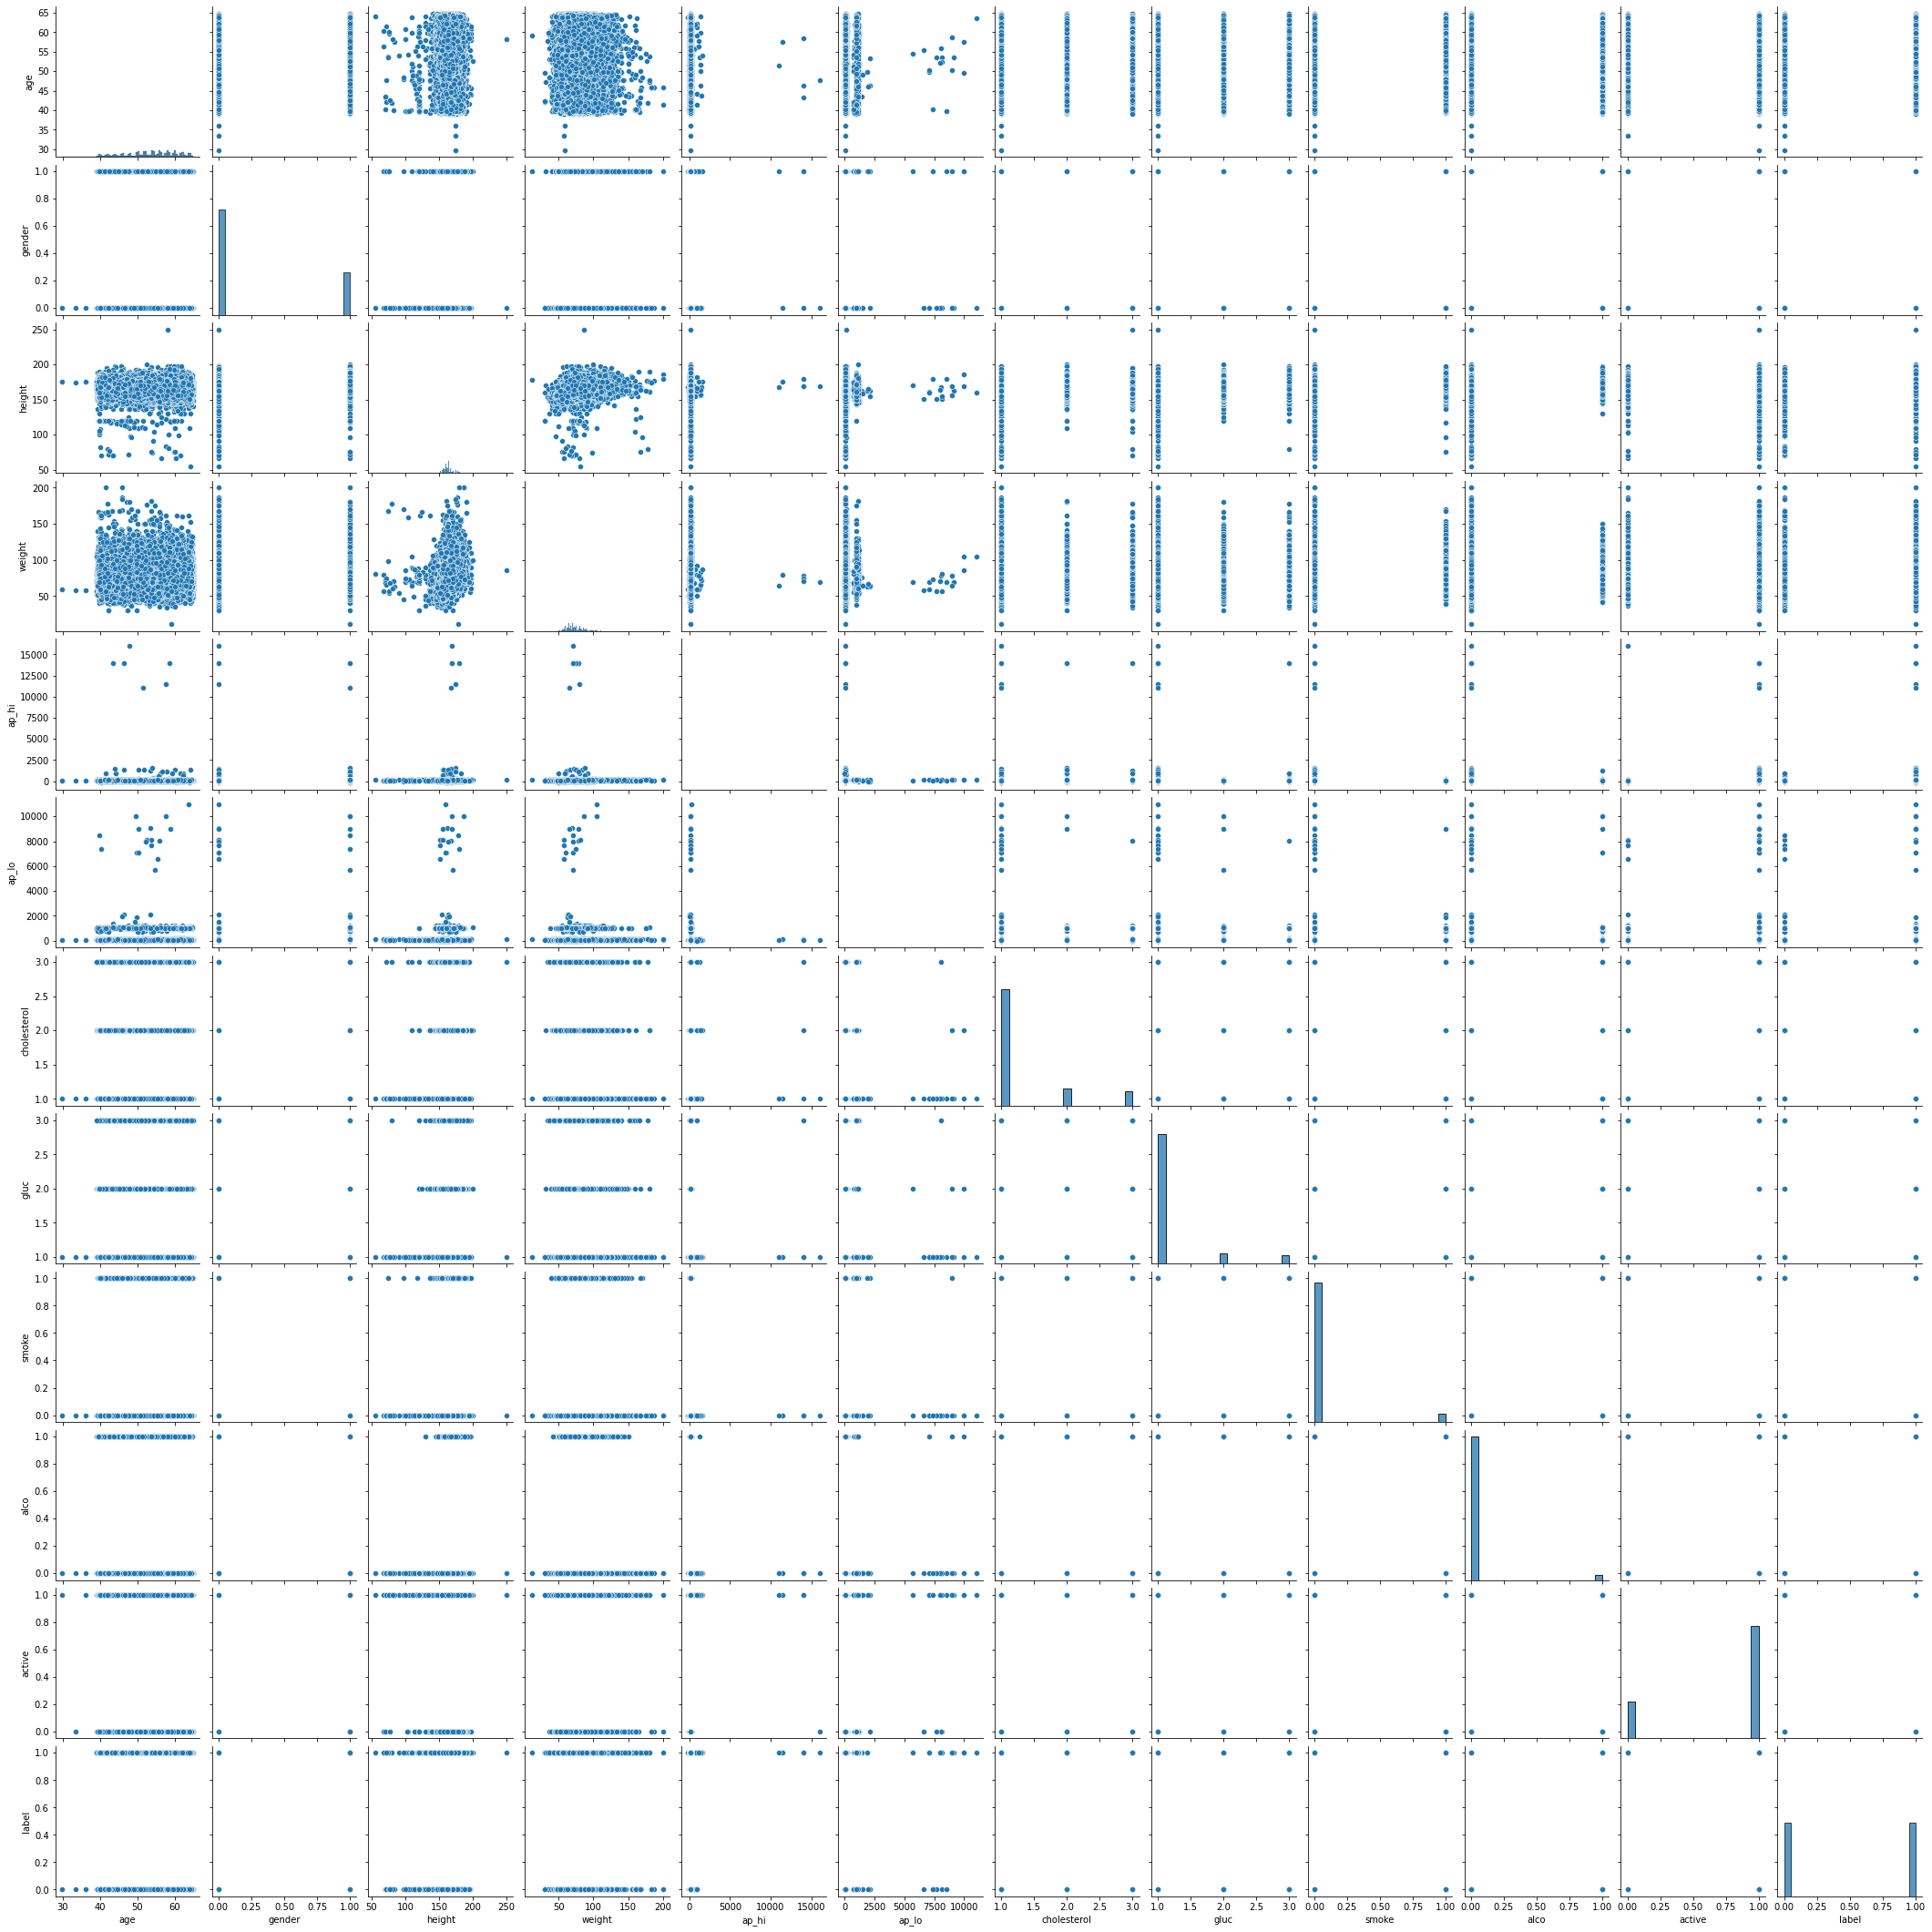

In [ ]:
sns.pairplot(df)

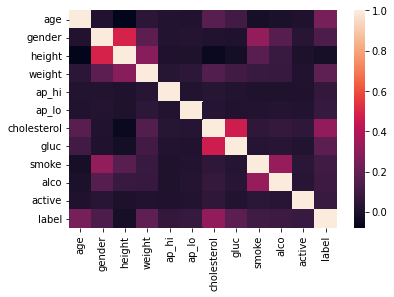

In [ ]:
sns.heatmap(df.corr())

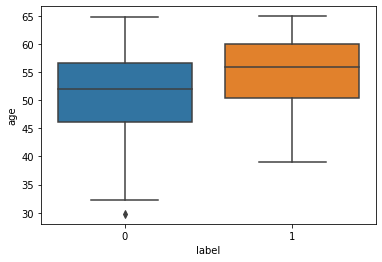

<Figure size 432x288 with 0 Axes>

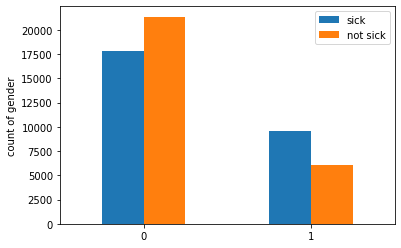

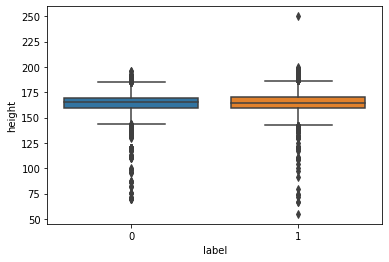

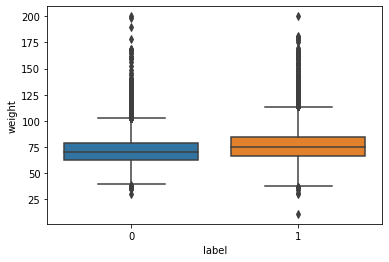

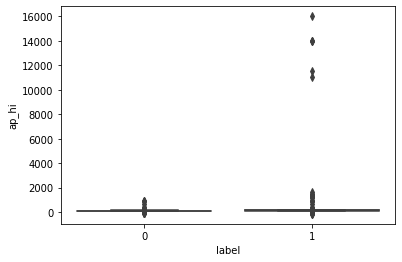

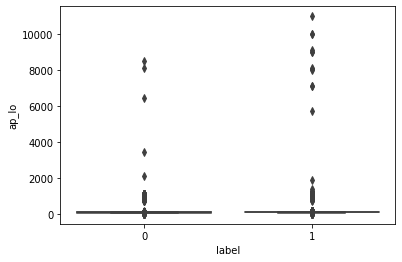

<Figure size 432x288 with 0 Axes>

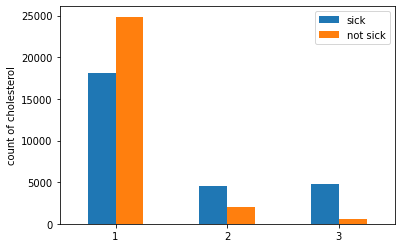

<Figure size 432x288 with 0 Axes>

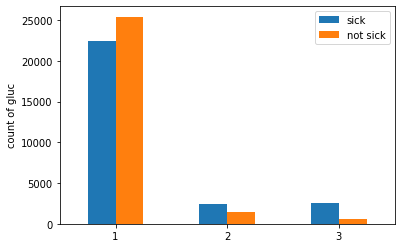

<Figure size 432x288 with 0 Axes>

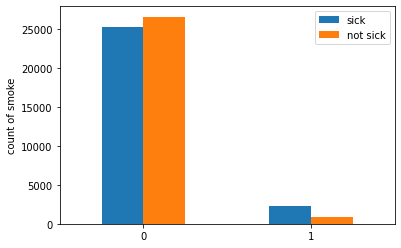

<Figure size 432x288 with 0 Axes>

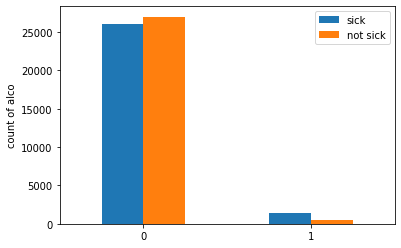

<Figure size 432x288 with 0 Axes>

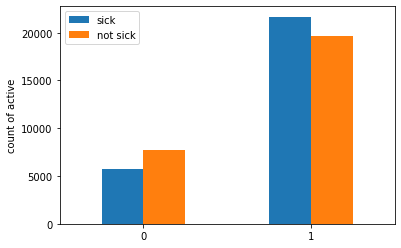

In [ ]:
for col in df.columns:
  if not col == 'label':
    plt.figure()
    plt.clf()
    if col in arr:
      ax = sns.boxplot(x = df['label'],y= df[col], data=df)
    else:
      values = np.sort(df[col].unique())
      sick = []
      not_sick = []
      for i in values:
        sicks_col = df_sicks[col]
        sick_count = sicks_col[df_sicks[col] == i].count()
        not_sicks_col = df_not_sicks_over[col]
        not_sick_count = not_sicks_col[df_not_sicks_over[col] == i].count()
        sick.append(sick_count)
        not_sick.append(not_sick_count)

      tmp = pd.DataFrame({'sick':sick, 'not sick': not_sick}, index=values)
      ax = tmp.plot.bar(rot=0)
      ax.set_ylabel('count of ' + col)


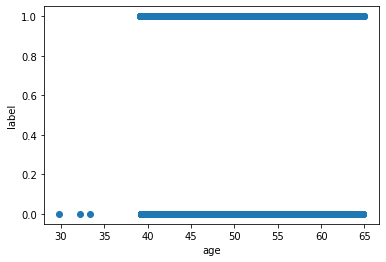

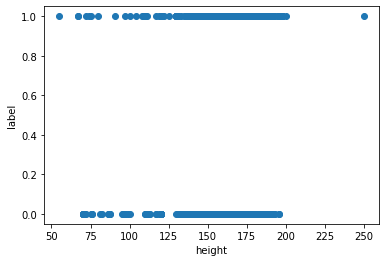

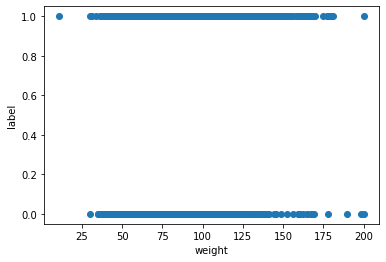

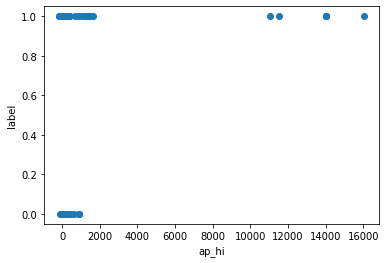

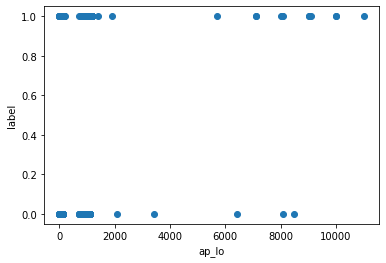




Z Score anomalies: 



<Figure size 432x288 with 0 Axes>

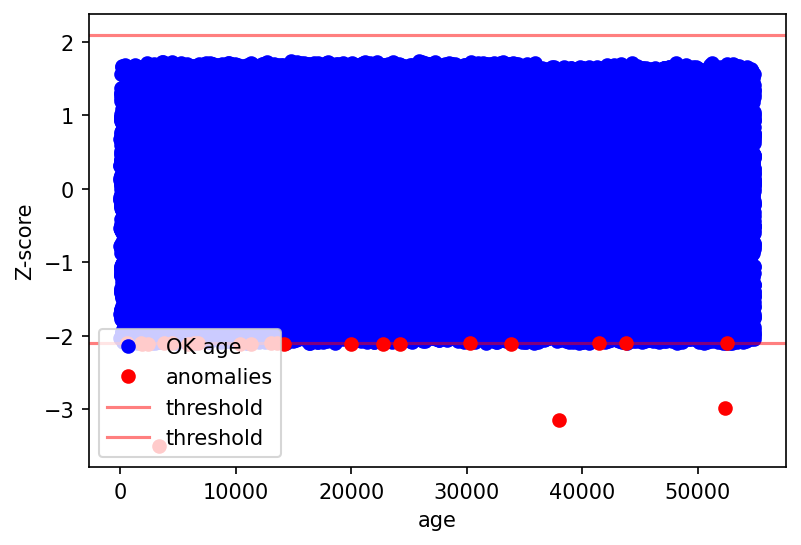

<Figure size 432x288 with 0 Axes>

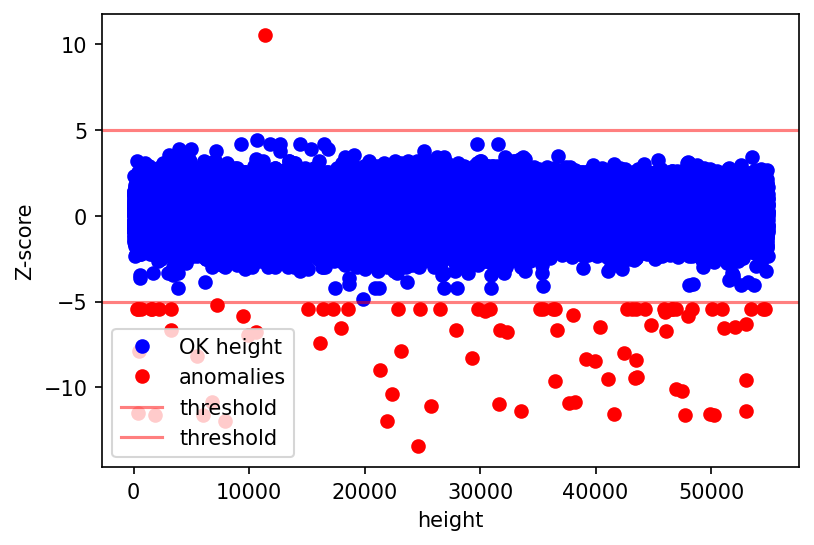

<Figure size 432x288 with 0 Axes>

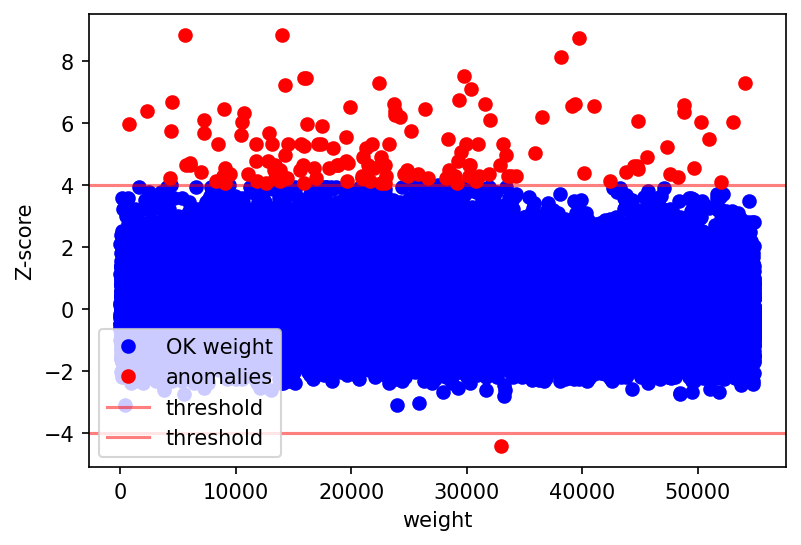

<Figure size 432x288 with 0 Axes>

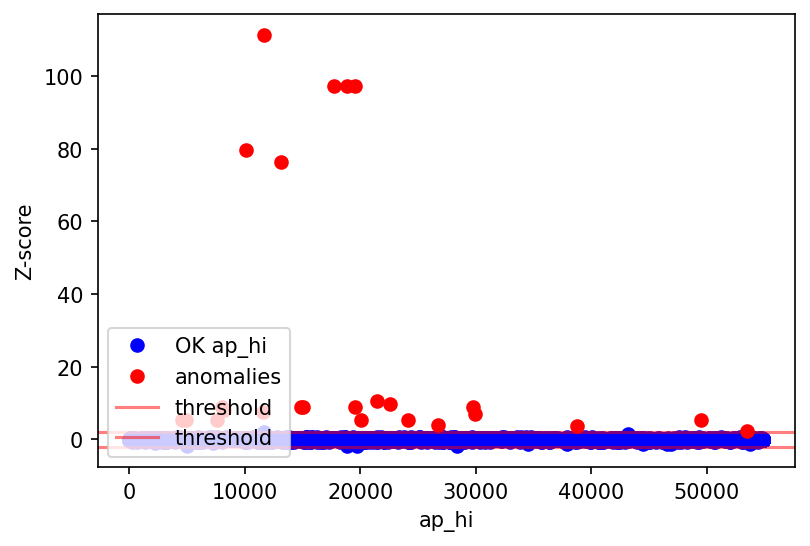

<Figure size 432x288 with 0 Axes>

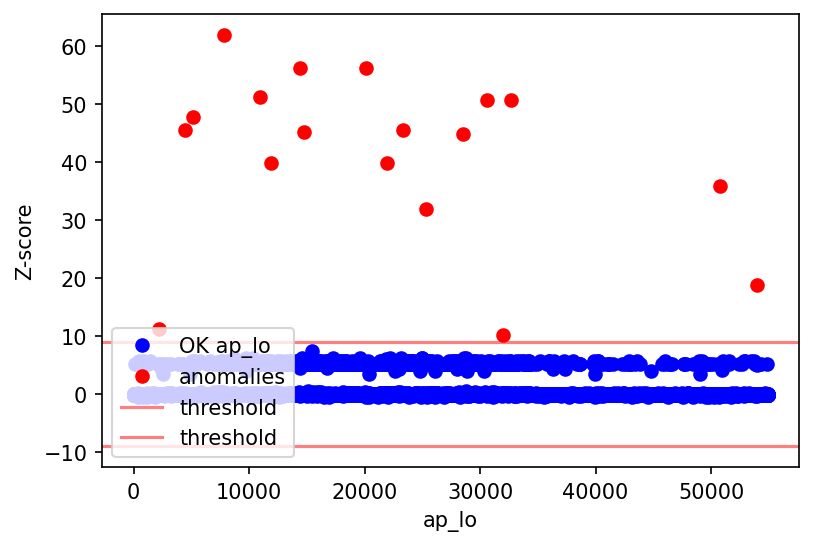




tucky anomalies: 



<Figure size 432x288 with 0 Axes>

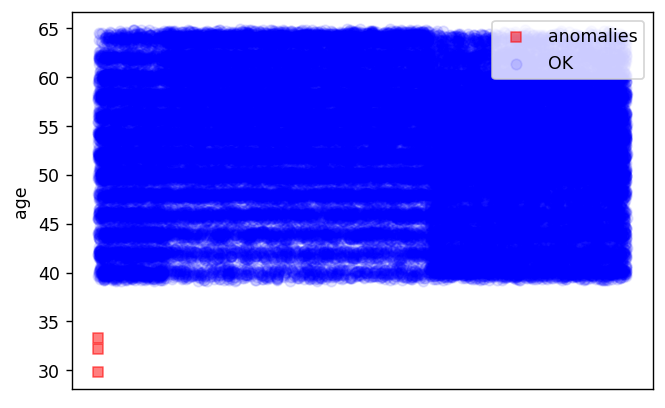

<Figure size 432x288 with 0 Axes>

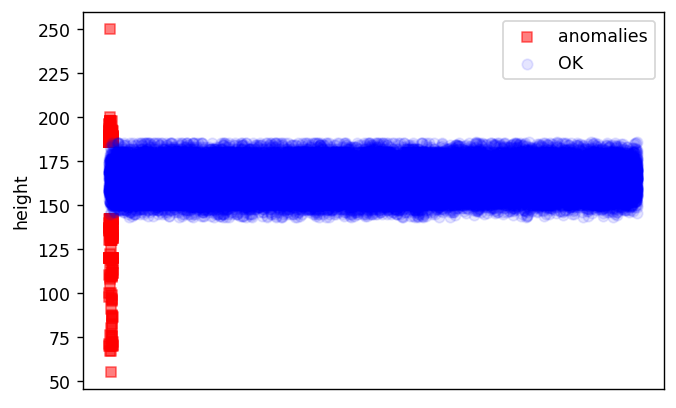

<Figure size 432x288 with 0 Axes>

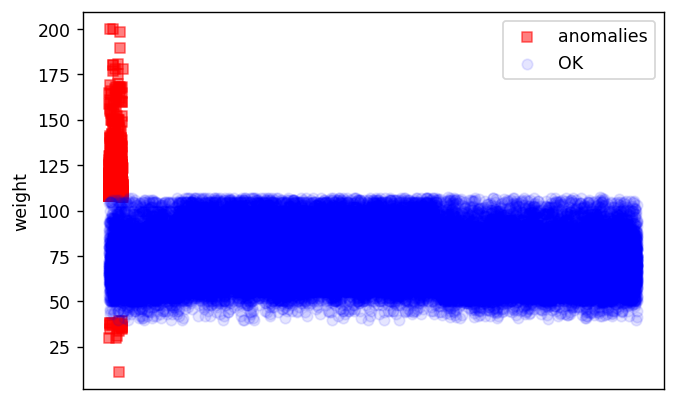

<Figure size 432x288 with 0 Axes>

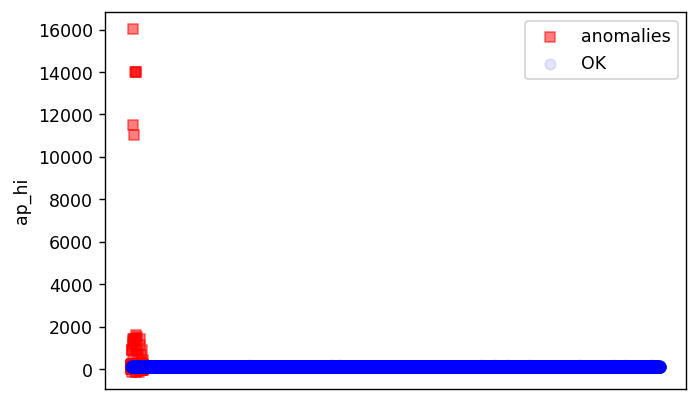

<Figure size 432x288 with 0 Axes>

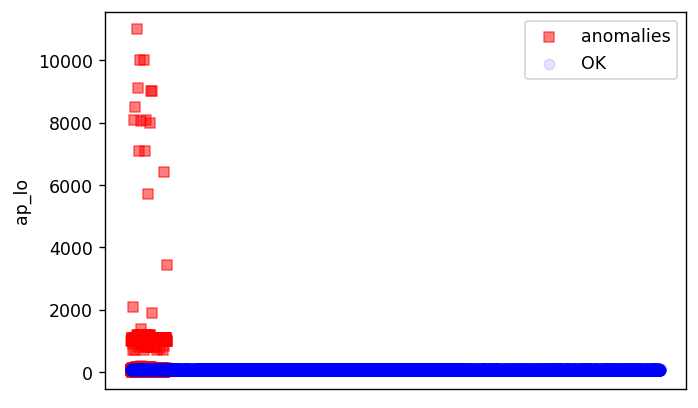

<Figure size 432x288 with 0 Axes>

In [ ]:
import scipy.stats as ss

threshold = {'age': 2.1, 'height': 5, 'weight': 4, 'ap_hi': 2, 'ap_lo': 9}

def z_score_anomaly(score_data, threshold, col):

    score_data = score_data.copy().values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold) + (score_data < -threshold)


    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='OK ' + col)
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.axhline(-threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.xlabel(col)
    plt.ylabel('Z-score')
    plt.show()

for col in df.columns:
  if col != 'label' and col in arr:
    plt.scatter(df[col], df['label'])
    plt.xlabel(col)
    plt.ylabel('label')
    plt.show()
    plt.cla()
    plt.clf()

print("\n\n")

df_copy = df.copy()

# Z Score
print("Z Score anomalies: \n")
for col in df_copy.columns:
  if col in threshold.keys():
    zscore_rate = ss.zscore(df_copy[col], ddof=0)
    df_copy = df_copy.assign(zscore=zscore_rate)
    z_score_anomaly(df_copy['zscore'], threshold[col], col)
    plt.cla()
    plt.clf()

# Tucky's anomalies
def tukey_anomaly(outliers,non_outliers,col):
    fig = plt.figure(dpi=125)
    graph = fig.add_subplot(111)
    graph.scatter(range(len(outliers)),outliers, c='r', marker="s", label='anomalies',alpha=0.5)
    graph.scatter(range(len(non_outliers)),non_outliers, c='b', marker="o", label='OK',alpha= 0.1)
    plt.legend(loc='upper right')
    graph.set(ylabel=col)
    graph.axes.get_xaxis().set_visible(False)
    plt.show()

print("\n\n")

print("tucky anomalies: \n")
outlier_strength = 1.5
for col in df.columns:
  if col in arr:
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3-q1
    mask_outlier = df[col][(df[col] < (q1 -outlier_strength * iqr)) | (df[col] > (q3 +outlier_strength * iqr))]
    mask_non_outlier = df[col][(df[col] > (q1 -outlier_strength * iqr)) & (df[col] < (q3 + outlier_strength * iqr))]
    tukey_anomaly(mask_outlier,mask_non_outlier,col)
    plt.cla()
    plt.clf()


normal distribution:


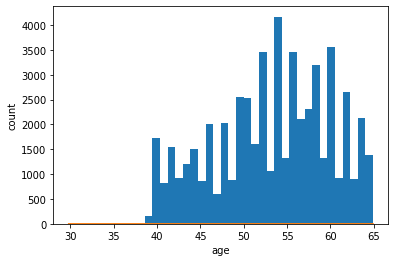

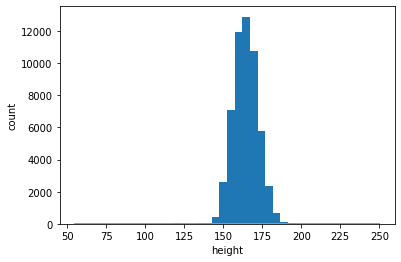

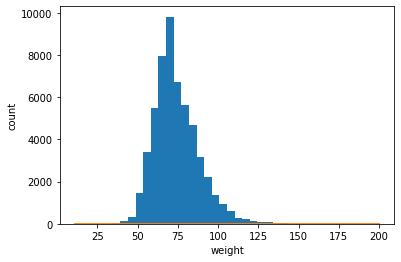

<Figure size 432x288 with 0 Axes>

In [ ]:

print("normal distribution:")

for col in df.columns:
  if col in arr and col not in ['ap_hi', 'ap_lo']:
    params = df[col].describe()
    mu, sigma = params['mean'], params['std']
    count, bins, ignored = plt.hist(df[col], 40)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    plt.cla()
    plt.clf()

In [ ]:
X, y = df.drop(columns='label'), df['label']
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

##### Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5, random_state=0,n_estimators= 150)
rf_model= rf_model.fit(x_train, y_train)

##### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_model =AdaBoostClassifier(n_estimators=250,learning_rate= 1.85, random_state=0,algorithm="SAMME.R")
ab_model = ab_model.fit(x_train, y_train)

##### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42,learning_rate=0.85)
xgb_model = xgb_model.fit(x_train, y_train)

In [ ]:
# soft voting
def majorityVoting(x):
  rf_result = rf_model.predict(x)
  ab_result = ab_model.predict(x)
  xg_result = xgb_model.predict(x)
  maj = (rf_result + ab_result + xg_result) / 3
  for i in range(len(maj)):
    if maj[i] >= 0.5:
      maj[i] = 1
    else :
      maj[i] = 0

  return maj

In [ ]:
from sklearn.tree import export_graphviz

estimator = rf_model.estimators_[10]

export_graphviz(estimator, out_file='tree.dot',
                feature_names = df.columns.drop('label'),
                class_names = ['0','1'],
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

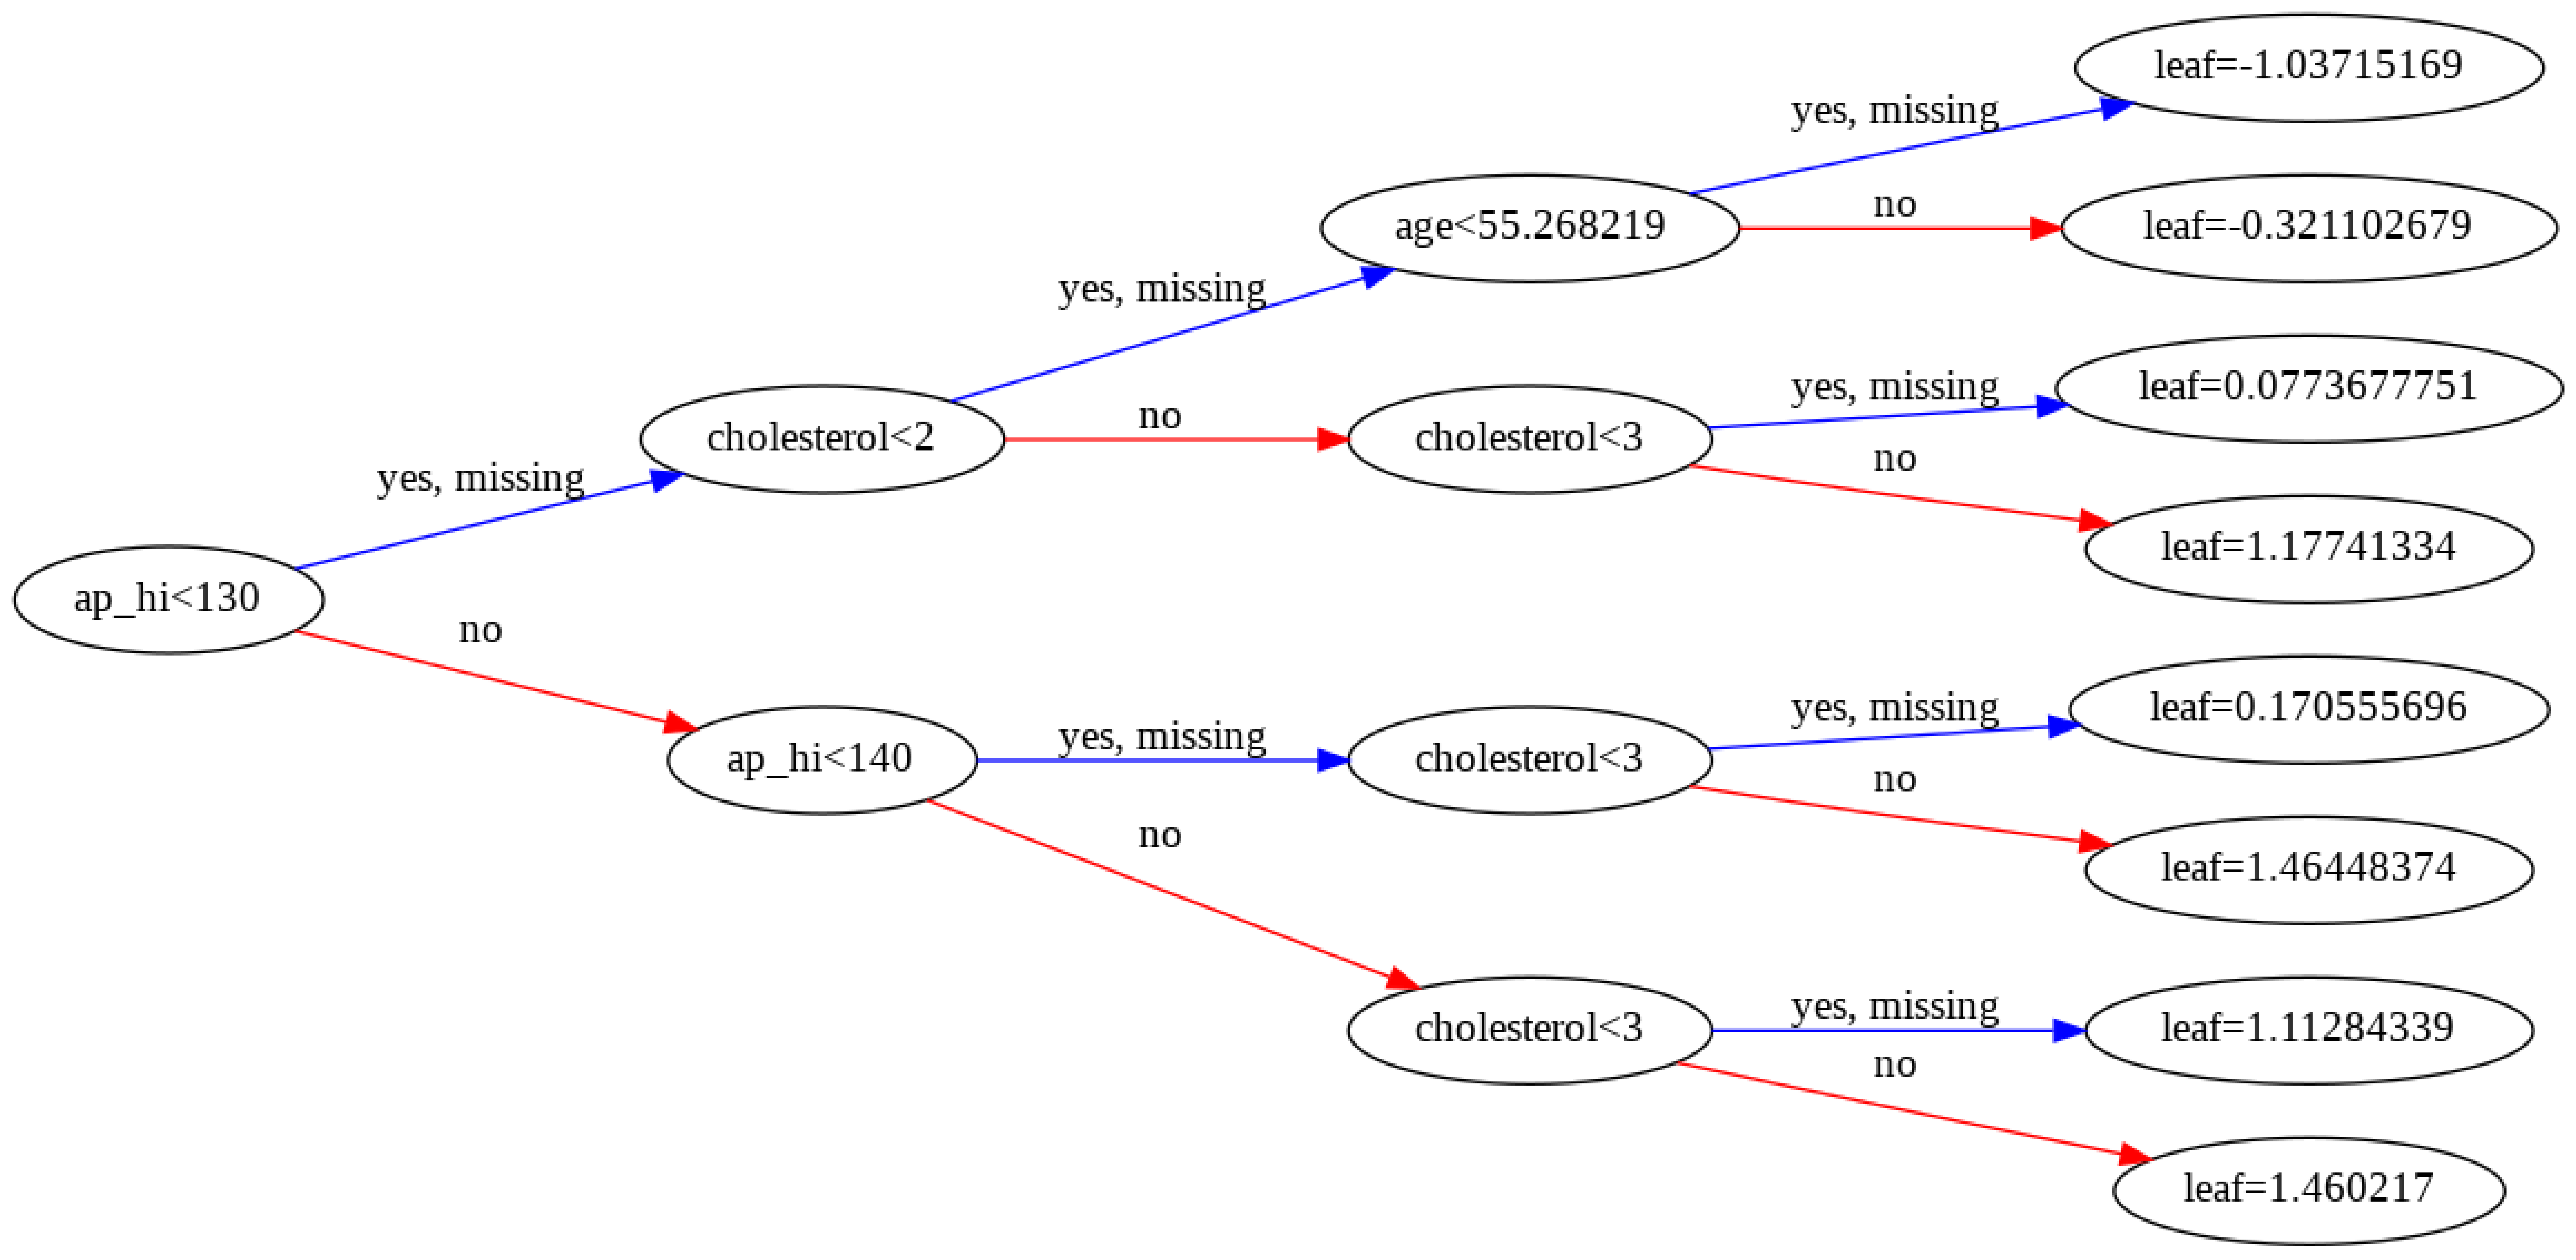

In [ ]:
from xgboost import plot_tree

_, ax = plt.subplots(figsize=(120,120))
plot_tree(xgb_model, num_trees=0, rankdir='LR',ax = ax)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



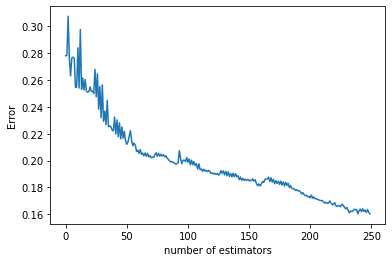

In [ ]:
import matplotlib.pyplot as plt

# Initialize list to store errors
errors = []

# Iterate over each iteration of the model
for prediction in ab_model.staged_predict(x_test):
    # Calculate error and append to list
    error = sum(prediction != y_test) / len(y_test)
    errors.append(error)

# Plot errors
plt.plot(errors)
plt.xlabel("number of estimators")
plt.ylabel("Error")

# Show plot
plt.show()

In [ ]:
import colorama
from colorama import Fore

prediction = rf_model.predict(x_test)
target_names = ['class 0', 'class 1']

print(Fore.BLUE + "Random Forest Classifier")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction))
print("Accuracy score:",accuracy_score(y_test, prediction))
print("Classification report:")
print(classification_report(y_test, prediction, target_names=target_names))


prediction = ab_model.predict(x_test)
print()
print(Fore.GREEN + "Adaboost Classifier")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction))
print("Accuracy score:",accuracy_score(y_test, prediction))
print("Classification report:")
print(classification_report(y_test, prediction, target_names=target_names))


prediction = xgb_model.predict(x_test)
print()
print(Fore.CYAN +"XGBoost Classifier")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction))
print("Accuracy score:",accuracy_score(y_test, prediction))
print("Classification report:")
print(classification_report(y_test, prediction, target_names=target_names))


prediction = majorityVoting(x_test)
print()
print(Fore.YELLOW +"Majority Voting")
print("Confusion matrix:")
print(confusion_matrix(y_test, prediction))
print("Accuracy score:",accuracy_score(y_test, prediction))
print("Classification report:")
print(classification_report(y_test, prediction, target_names=target_names))

Random Forest Classifier
Confusion matrix:
[[7413 1662]
 [2659 6385]]
Accuracy score: 0.7615210552458745
Classification report:
              precision    recall  f1-score   support

     class 0       0.74      0.82      0.77      9075
     class 1       0.79      0.71      0.75      9044

    accuracy                           0.76     18119
   macro avg       0.76      0.76      0.76     18119
weighted avg       0.76      0.76      0.76     18119


Adaboost Classifier
Confusion matrix:
[[7692 1383]
 [1519 7525]]
Accuracy score: 0.8398366355759148
Classification report:
              precision    recall  f1-score   support

     class 0       0.84      0.85      0.84      9075
     class 1       0.84      0.83      0.84      9044

    accuracy                           0.84     18119
   macro avg       0.84      0.84      0.84     18119
weighted avg       0.84      0.84      0.84     18119


XGBoost Classifier
Confusion matrix:
[[7706 1369]
 [ 946 8098]]
Accuracy score: 0.87223356697

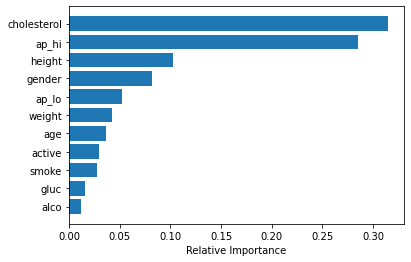

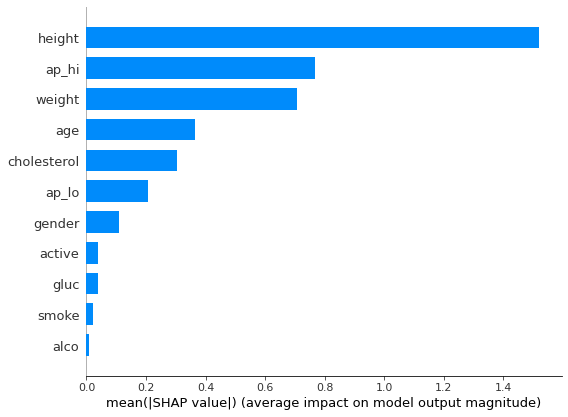

In [ ]:
shap.initjs()
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print('\n')
shap.summary_plot(shap.TreeExplainer(xgb_model).shap_values(x_train), x_train, feature_names=features, plot_type="bar")